# Análisis Exploratorio de Datos

En este notebook realizamos un análisis exploratorio del dataset `House Prices: Advanced Regression Techniques`.

## Objetivos
- Describir las columnas del dataset.
- Identificar valores faltantes y duplicados.
- Realizar visualizaciones iniciales para entender mejor los datos.


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np

# Cargar el dataset
train_df = pd.read_csv('data/raw/train.csv')
test_df = pd.read_csv('data/raw/test.csv')

# Inspección inicial
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Descripción de Columnas

A continuación, se describe cada columna del dataset, incluyendo su tipo de dato y una breve descripción.


In [2]:
# Descripción de columnas
column_descriptions = {
    'Id': 'Identificador único para cada casa',
    'MSSubClass': 'Clase del edificio',
    'MSZoning': 'Clasificación de la zona',
    'LotFrontage': 'Frente del lote (en pies)',
    'LotArea': 'Área del lote (en pies cuadrados)',
    'Street': 'Tipo de camino de acceso',
    'Alley': 'Tipo de callejón de acceso',
    'LotShape': 'Forma de la propiedad',
    'LandContour': 'Contorno de la propiedad',
    'Utilities': 'Servicios públicos disponibles',
    'LotConfig': 'Configuración del lote',
    'LandSlope': 'Pendiente de la propiedad',
    'Neighborhood': 'Vecindario',
    'Condition1': 'Proximidad a diversas condiciones',
    'Condition2': 'Proximidad a diversas condiciones (segunda)',
    'BldgType': 'Tipo de vivienda',
    'HouseStyle': 'Estilo de la vivienda',
    'OverallQual': 'Calidad general del material y acabado',
    'OverallCond': 'Condición general de la casa',
    'YearBuilt': 'Año de construcción original',
    'YearRemodAdd': 'Año de remodelación',
    'RoofStyle': 'Estilo del techo',
    'RoofMatl': 'Material del techo',
    'Exterior1st': 'Revestimiento exterior',
    'Exterior2nd': 'Revestimiento exterior (segunda)',
    'MasVnrType': 'Tipo de revestimiento de mampostería',
    'MasVnrArea': 'Área de mampostería en pies cuadrados',
    'ExterQual': 'Calidad del material exterior',
    'ExterCond': 'Condición del material exterior',
    'Foundation': 'Tipo de fundación',
    'BsmtQual': 'Altura del sótano',
    'BsmtCond': 'Condición del sótano',
    'BsmtExposure': 'Calidad de exposición del sótano',
    'BsmtFinType1': 'Calidad del acabado del sótano',
    'BsmtFinSF1': 'Pies cuadrados terminados del sótano tipo 1',
    'BsmtFinType2': 'Calidad del acabado del sótano (segunda)',
    'BsmtFinSF2': 'Pies cuadrados terminados del sótano tipo 2',
    'BsmtUnfSF': 'Área no terminada del sótano',
    'TotalBsmtSF': 'Área total del sótano',
    'Heating': 'Tipo de calefacción',
    'HeatingQC': 'Calidad y condición de la calefacción',
    'CentralAir': 'Aire acondicionado central',
    'Electrical': 'Sistema eléctrico',
    '1stFlrSF': 'Pies cuadrados del primer piso',
    '2ndFlrSF': 'Pies cuadrados del segundo piso',
    'LowQualFinSF': 'Área terminada de baja calidad',
    'GrLivArea': 'Área de vivienda por encima del nivel del suelo',
    'BsmtFullBath': 'Baños completos en el sótano',
    'BsmtHalfBath': 'Medios baños en el sótano',
    'FullBath': 'Baños completos por encima del nivel del suelo',
    'HalfBath': 'Medios baños por encima del nivel del suelo',
    'BedroomAbvGr': 'Número de dormitorios por encima del nivel del suelo',
    'KitchenAbvGr': 'Número de cocinas por encima del nivel del suelo',
    'KitchenQual': 'Calidad de la cocina',
    'TotRmsAbvGrd': 'Total de habitaciones por encima del nivel del suelo',
    'Functional': 'Funcionalidad del hogar',
    'Fireplaces': 'Número de chimeneas',
    'FireplaceQu': 'Calidad de la chimenea',
    'GarageType': 'Ubicación del garaje',
    'GarageYrBlt': 'Año en que se construyó el garaje',
    'GarageFinish': 'Acabado interior del garaje',
    'GarageCars': 'Capacidad del garaje en número de coches',
    'GarageArea': 'Área del garaje en pies cuadrados',
    'GarageQual': 'Calidad del garaje',
    'GarageCond': 'Condición del garaje',
    'PavedDrive': 'Calzada pavimentada',
    'WoodDeckSF': 'Área de la plataforma de madera en pies cuadrados',
    'OpenPorchSF': 'Área del porche abierto en pies cuadrados',
    'EnclosedPorch': 'Área del porche cerrado en pies cuadrados',
    '3SsnPorch': 'Área del porche de tres estaciones en pies cuadrados',
    'ScreenPorch': 'Área del porche con mosquitero en pies cuadrados',
    'PoolArea': 'Área de la piscina en pies cuadrados',
    'PoolQC': 'Calidad de la piscina',
    'Fence': 'Calidad de la cerca',
    'MiscFeature': 'Características misceláneas',
    'MiscVal': 'Valor de las características misceláneas',
    'MoSold': 'Mes de venta',
    'YrSold': 'Año de venta',
    'SaleType': 'Tipo de venta',
    'SaleCondition': 'Condición de la venta',
    'SalePrice': 'Precio de venta'
}

for column in train_df.columns:
    description = column_descriptions.get(column, 'No description available')
    print(f'{column} ({train_df[column].dtype}): {description}')

Id (int64): Identificador único para cada casa
MSSubClass (int64): Clase del edificio
MSZoning (object): Clasificación de la zona
LotFrontage (float64): Frente del lote (en pies)
LotArea (int64): Área del lote (en pies cuadrados)
Street (object): Tipo de camino de acceso
Alley (object): Tipo de callejón de acceso
LotShape (object): Forma de la propiedad
LandContour (object): Contorno de la propiedad
Utilities (object): Servicios públicos disponibles
LotConfig (object): Configuración del lote
LandSlope (object): Pendiente de la propiedad
Neighborhood (object): Vecindario
Condition1 (object): Proximidad a diversas condiciones
Condition2 (object): Proximidad a diversas condiciones (segunda)
BldgType (object): Tipo de vivienda
HouseStyle (object): Estilo de la vivienda
OverallQual (int64): Calidad general del material y acabado
OverallCond (int64): Condición general de la casa
YearBuilt (int64): Año de construcción original
YearRemodAdd (int64): Año de remodelación
RoofStyle (object): Esti

## Identificación de Problemas

Identificamos valores faltantes y filas duplicadas en el dataset.


Missing values:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


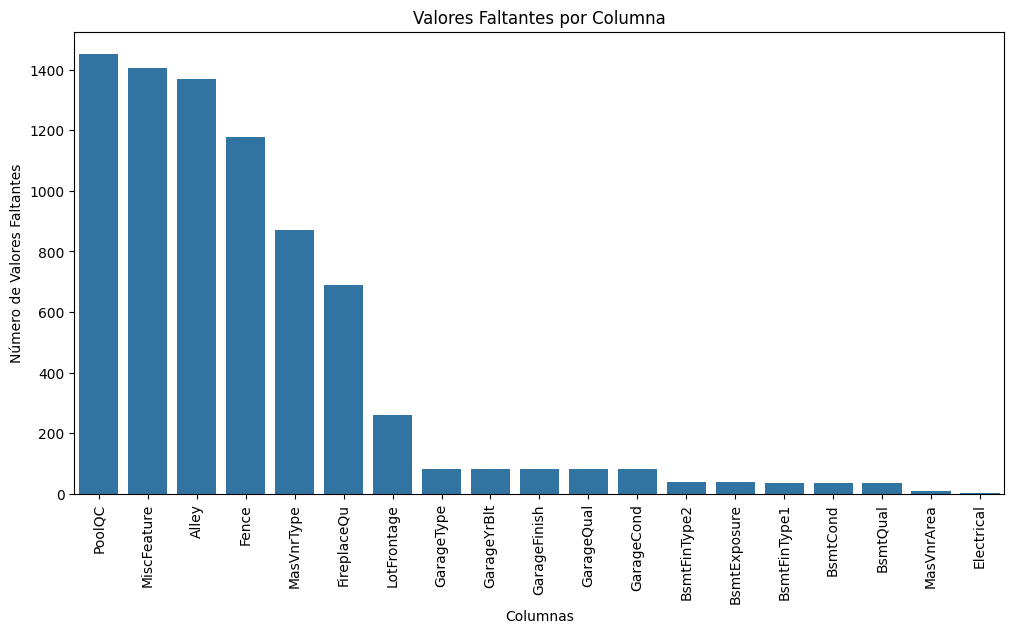

Duplicated rows: 0


In [3]:
# Identificación de valores faltantes
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(f'Missing values:\n{missing_values}')

# Visualización de valores faltantes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Valores Faltantes por Columna')
plt.ylabel('Número de Valores Faltantes')
plt.xlabel('Columnas')
plt.show()

# Identificación de duplicados
duplicated_rows = train_df.duplicated().sum()
print(f'Duplicated rows: {duplicated_rows}')